In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset

from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()  # returns a dictionary of dataset
print(diabetes_dataset['DESCR'])  # description of the dataset

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [3]:
# Save the input and target variables

print(diabetes_dataset.keys())
data = diabetes_dataset['data']
targets = diabetes_dataset['target']

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [4]:
# Normalise the target data (this will make clearer training curves)
print("Initially targets are")
print(targets)

targets = (targets - targets.mean(axis = 0)) / targets.std()
print("After normalization")
print(targets)

Initially targets are
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 265. 101. 137. 143. 141.  79. 292. 178.  91.

In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split 

train_data, test_data, train_targets, test_targets = train_test_split(data, targets,test_size = 0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [6]:
# Build the model

def get_model():
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=128, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dense(units=1)) # default activation function is linear
    
    return model
    
model = get_model()

In [7]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model

model.compile(
    optimizer ='adam',
    loss = 'mae',
    metrics = ['mae']
)

In [9]:
# Train the model, with some of the data reserved for validation

history = model.fit(
    train_data, 
    train_targets, 
    epochs = 100,
    validation_split = 0.15, 
    batch_size=64,
    verbose=False
)

In [10]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose = 2)

45/1 - 0s - loss: 0.8316 - mae: 0.7360


[0.7359763754738702, 0.73597634]

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

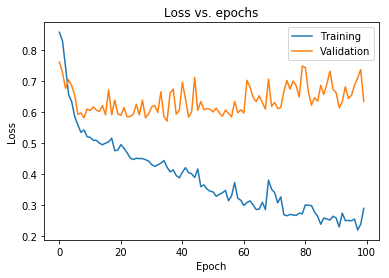

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [15]:
# Re-build the model with weight decay and dropout layers

model = get_regularised_model(1e-5, 0.3)

In [16]:
# Compile the model

model.compile(
    optimzier = 'adam',
    loss = 'mae',
    metrics = ['mae']
)

In [17]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 100, verbose = False, validation_split = 0.15, batch_size = 64)

In [18]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose = 2)

45/1 - 0s - loss: 0.7118 - mae: 0.6028


[0.6081350525220235, 0.60276043]

#### Plot the learning curves

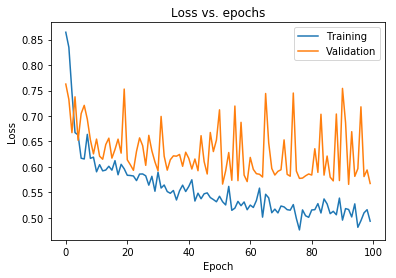

In [19]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [20]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class trainingCallback(Callback):
    
    def on_train_begin(self, logs = None):
        print("Starting training")
        
    def on_epoch_begin(self, epoch, logs = None):
        print(f'Starting epoch {epoch}')
        
    def on_train_batch_begin(self, batch, logs = None):
        print(f'Training: Starting batch {batch}')
        
    def on_train_batch_end(self, batch, logs = None):
        print(f'Training: Finished batch {batch}')
        
    def on_epoch_end(self, epoch, logs = None):
        print(f'Training: Finished epoch {epoch}')
        
    def on_train_end(self, logs = None):
        print("Finished Trainging")


In [21]:
class testingCallback(Callback):
    
    def on_test_begin(self, logs = None):
        print("Starting testing")
        
    def on_epoch_begin(self, epoch, logs = None):
        print(f'Starting epoch {epoch}')
        
    def on_test_batch_begin(self, batch, logs = None):
        print(f'Testing: Starting batch {batch}')
        
    def on_test_batch_end(self, batch, logs = None):
        print(f'Testing: Finished batch {batch}')
        
    def on_epoch_end(self, epoch, logs = None):
        print(f'Testing: Finished epoch {epoch}')
        
    def on_test_end(self, logs = None):
        print("Finished Testing")

In [22]:
class predictionCallback(Callback):
    
    def on_predict_begin(self, logs = None):
        print("Starting prediction")
        
        
    def on_predic_batch_begin(self, batch, logs = None):
        print(f'Prediction: Starting batch {batch}')
        
    def on_predict_batch_end(self, batch, logs = None):
        print(f'Prediction: Finished batch {batch}')
   
        
    def on_predict_end(self, logs = None):
        print("Finished Prediction")

In [23]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)


In [24]:
# Compile the model

model.compile(
    optimzer = 'adam',
    loss = 'mae',
    metrics = ['mae']
)

#### Train the model with the callback

In [25]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, epochs = 3, batch_size = 128, verbose = False, callbacks = [trainingCallback()])

Starting training
Starting epoch 0
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Training: Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Training: Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Training: Finished epoch 2
Finished Trainging


In [26]:
# Evaluate the model

model.evaluate(test_data, test_targets, callbacks = [testingCallback()], verbose = False)

Starting testing
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
Finished Testing


[0.7423178500599331, 0.73582715]

In [27]:
# Make predictions with the model

model.predict(test_data, verbose = False, callbacks = [predictionCallback()])

Starting prediction
Prediction: Finished batch 0
Prediction: Finished batch 1
Finished Prediction


array([[-0.06776835],
       [-0.09832036],
       [-0.5989321 ],
       [-0.6080872 ],
       [ 0.11921929],
       [ 0.14933214],
       [-0.38081428],
       [-0.60047215],
       [-0.34909806],
       [-0.17002481],
       [-0.47084615],
       [-0.05338935],
       [ 0.18413073],
       [ 0.14161347],
       [ 0.20452605],
       [ 0.01703582],
       [-0.44147506],
       [ 0.02581068],
       [ 0.1945381 ],
       [ 0.02439406],
       [ 0.19180197],
       [ 0.21561275],
       [ 0.22416043],
       [-0.5452918 ],
       [ 0.11309009],
       [-0.31546092],
       [-0.26755202],
       [ 0.11593222],
       [ 0.1327346 ],
       [-0.57995534],
       [-0.52703947],
       [ 0.14860915],
       [-0.22897461],
       [-0.44326437],
       [ 0.1559924 ],
       [ 0.1964733 ],
       [-0.72632205],
       [ 0.1547051 ],
       [-0.63929033],
       [ 0.16402878],
       [ 0.17068036],
       [ 0.17126563],
       [ 0.10523053],
       [-0.5638586 ],
       [ 0.13669662]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [41]:
# Re-train the unregularised model

unregularised_model = get_model()
unregularised_model.compile(
    optimizer = 'adam',
    loss = 'mae'
)
unreg_history = unregularised_model.fit(
    train_data, 
    train_targets,
    epochs = 100,
    validation_split = 0.15,
    batch_size = 64, 
    verbose = False,
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=4)]
)

In [42]:
# Evaluate the model on the test set

unregularised_model.evaluate(
    test_data,
    test_targets, 
    verbose = 2
)

45/1 - 0s - loss: 0.7615


0.6358941396077474

In [43]:
# Re-train the regularised model

regularised_model = get_regularised_model(1e-5, 0.2)
regularised_model.compile(
    optimizer = 'adam',
    loss = 'mae'
)
reg_history = regularised_model.fit(
    train_data, 
    train_targets,
    epochs = 100,
    validation_split = 0.15,
    batch_size = 64, 
    verbose = False,
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=4)]
)

In [44]:
# Evaluate the model on the test set

regularised_model.evaluate(
    test_data, 
    test_targets,
    verbose = 2
)

45/1 - 0s - loss: 0.7344


0.62706821097268

#### Plot the learning curves

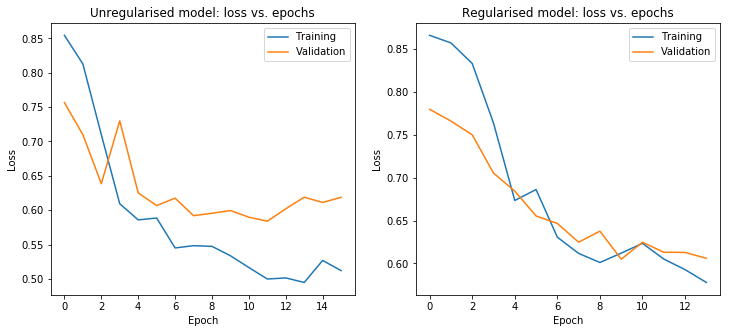

In [45]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()